# DigitalVidya

In [53]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
from pylab import rcParams
import seaborn as sns
import scipy.stats
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


In [54]:
# load dataset
#file_path = os.path.join(os.path.abspath('..'), 'Datasets', 'voice.csv')
#voice_df = pd.read_csv(file_path)
#voice_df.head()

In [55]:
# 1. Load the "voice.csv" dataset and perform feature extraction by using "label" as target column
df = pd.read_csv('C:\\Users\\SHUBHA\\Desktop\\Session-1-Introduction-To-Data-Analytics-Assignment\\Assignmnet 13\\voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [56]:
df.isnull().any()

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool

In [57]:
#Feature extration:
y = df.iloc[:, -1].values
X = df.iloc[:, :-1].values

from sklearn.ensemble import ExtraTreesClassifier
tree_clf = ExtraTreesClassifier()
tree_clf.fit(X, y)

tree_clf.feature_importances_


array([0.02192175, 0.14024688, 0.02960664, 0.08799646, 0.01970938,
       0.11601042, 0.01739684, 0.00908043, 0.08169997, 0.01647099,
       0.02697863, 0.02063509, 0.33518345, 0.00986059, 0.00889144,
       0.01500492, 0.0128766 , 0.0101429 , 0.01083987, 0.00944675])

In [8]:
importances = tree_clf.feature_importances_
feature_names = df.iloc[:, :-1].columns.tolist()
feature_names
feature_imp_dir = dict(zip(feature_names, importances))
features = sorted(feature_imp_dir.items(), key=lambda x: x[1], reverse=True)
feature_imp_dir

{'meanfreq': 0.03156337169624376,
 'sd': 0.051651313840388804,
 'median': 0.01390001741566686,
 'Q25': 0.11998498424290864,
 'Q75': 0.016032299744349505,
 'IQR': 0.21051835694660753,
 'skew': 0.017445018664154033,
 'kurt': 0.009510816879239836,
 'sp.ent': 0.048861859153999584,
 'sfm': 0.021422109905383045,
 'mode': 0.02857455105011311,
 'centroid': 0.02132231258773908,
 'meanfun': 0.3230659662529799,
 'minfun': 0.014640247779951977,
 'maxfun': 0.007372931554285074,
 'meandom': 0.01575532185776072,
 'mindom': 0.009368548872648149,
 'maxdom': 0.012106546851071147,
 'dfrange': 0.018312865500717552,
 'modindx': 0.00859055920379171}

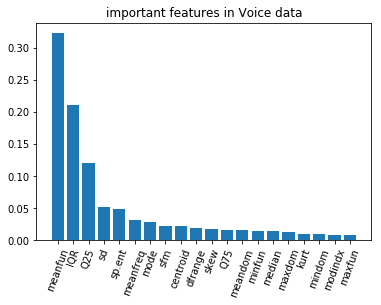

In [58]:
plt.xticks(rotation=70)
plt.bar(range(len(features)), [imp[1] for imp in features], align='center',tick_label = [imp[0] for imp in features])
plt.title('important features in Voice data');

In [59]:
X = df.iloc[:, :-1]
from sklearn.feature_selection import SelectFromModel
abc = SelectFromModel(tree_clf, prefit = True)
x_updated = abc.transform(X)
print('Total Features count:', np.array(X).shape[1])
print('Selected Features: ' ,np.array(x_updated).shape[1])
print('Selected Features: ', X.columns[abc.get_support()])

Total Features count: 20
Selected Features:  5
Selected Features:  Index(['sd', 'Q25', 'IQR', 'sp.ent', 'meanfun'], dtype='object')


In [60]:
# 2. Split the training and testing data
#Split the data

from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [61]:
# 3. Build a Logistic Regression classifier to detect the target
#Fitting logistic regression to training set

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

accuracy, cm

(0.9148264984227129, array([[257,  44],
        [ 10, 323]], dtype=int64))

In [62]:
# 4. Check performances by using different number of features. Find the best set of features
# Selecting the 5 important features() from feature extraction done above
y=df['label']
X=df[['sd', 'Q25', 'IQR', 'sp.ent', 'meanfun']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

accuracy, cm



(0.9211356466876972, array([[258,  43],
        [  7, 326]], dtype=int64))

In [63]:
# Selecting the 7 important features() from feature extraction done above
y=df['label']
X=df[['sd', 'Q25', 'IQR', 'sp.ent', 'meanfun','meanfreq','mode']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

accuracy, cm


(0.919558359621451, array([[255,  46],
        [  5, 328]], dtype=int64))

In [ ]:
#Best set of features are 'sd', 'Q25', 'IQR', 'sp.ent', 'meanfun' with accuracy score 0.9211.

In [64]:
# 5. Build a KNN classifier to detect the label
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
predictions = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9842271293375394

In [65]:
# 6. Find and plot the best value for k
n_neighbors = np.arange(1, 20, 2)
n_neighbors

accuracies = []
for n in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    knn_clf.fit(X_train, y_train)
    predictions = knn_clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
accuracies

[0.973186119873817,
 0.9747634069400631,
 0.9842271293375394,
 0.9794952681388013,
 0.9794952681388013,
 0.9794952681388013,
 0.9810725552050473,
 0.9794952681388013,
 0.9747634069400631,
 0.9747634069400631]

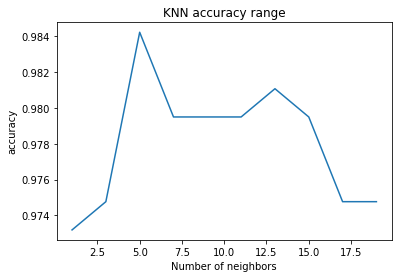

k=5 achieved highest accuracy of 98.42% on validation data


In [52]:
import matplotlib.pyplot as plt

plt.title('KNN accuracy range')
plt.xlabel('Number of neighbors')
plt.ylabel('accuracy')
plt.plot(n_neighbors, accuracies)
plt.show()

#Find the value of k that has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (n_neighbors[i],
	accuracies[i] * 100))

In [ ]:
# The best value of k from above graph is 5.